In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
!pip install -q keras
from keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping




# drive.mount('/content/drive')

In [9]:
#train+, test+ and test21- dataset loading
train = 'nsl_dl/KDDTrain+.csv'
test = 'nsl_dl/KDDTest+.csv'
test21 = 'nsl_dl/KDDTest-21.csv'

featureV = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV = ['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV = ['tcp','udp','icmp']

serviceV = ['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack = ['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack = { 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}                   

In [10]:
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [11]:
test_21 = pd.read_csv(test21)

In [12]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_lvl
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
train_data = train_data.query("service != 'aol'")
train_data = train_data.query("service != 'harvest'")
train_data = train_data.query("service != 'http_2784'")
train_data = train_data.query("service != 'http_8001'")
train_data = train_data.query("service != 'red_i'")
train_data = train_data.query("service != 'urh_i'")
train_data = train_data.query("service != 'printer'")
train_data = train_data.query("service != 'rje'")

test_data = test_data.query("service != 'printer'")
test_data = test_data.query("service != 'rje'")

# Working with **Training** Data 

In [13]:
def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")

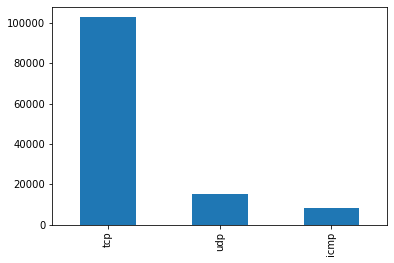

In [14]:
bar_graph('protocol_type')

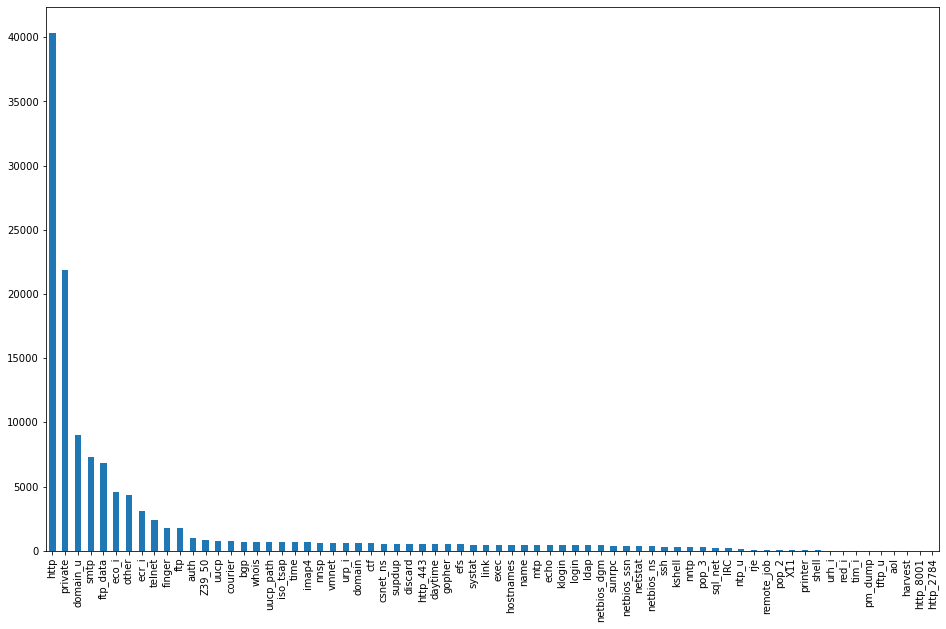

In [18]:
plt.figure(figsize=(16,10))
bar_graph('service')

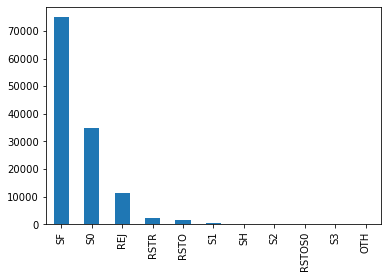

In [19]:
bar_graph('flag')

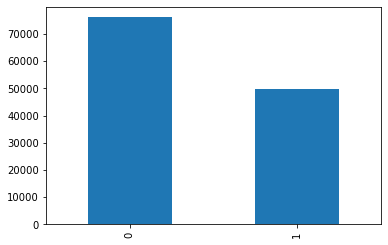

In [20]:
bar_graph('logged_in')

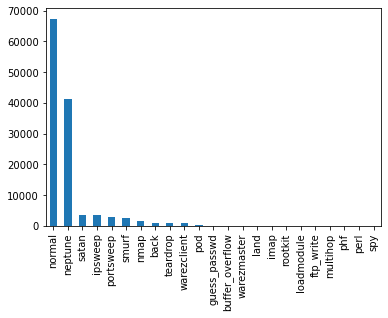

In [21]:
bar_graph('attack_type')

# **Correlations**

# Working with **Validation** data

In [22]:
def preprocessing(data,cls,df):
  
#----------attack categorization----------------->
  data['attack_type']=data['attack_type'].replace(['normal.','normal'],0)

#----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['attack_type'] = data['attack_type'].replace(binary_attack[i], 1)
  
#---------------multiclass classification-------------------->  
  elif cls=='multiclass':
    for i in range(len(multiclass_attack['probe'])):
      data['attack_type']=data['attack_type'].replace([multiclass_attack['probe'][i],multiclass_attack['probe'][i][:-1]],1)
    
    for i in range(len(multiclass_attack['dos'])):
      data['attack_type']=data['attack_type'].replace([multiclass_attack['dos'][i],multiclass_attack['dos'][i][:-1]],2)
    
    for i in range(len(multiclass_attack['u2r'])):
      data['attack_type']=data['attack_type'].replace([multiclass_attack['u2r'][i],multiclass_attack['u2r'][i][:-1]],3)
    
    for i in range(len(multiclass_attack['r2l'])):
      data['attack_type'] = data['attack_type'].replace([multiclass_attack['r2l'][i],multiclass_attack['r2l'][i][:-1]],4)
#------------------------------------------------>


#-------------------------splitting features and labels---------------->
  y=data['attack_type']
  x=data.loc[:,'duration':'hot']
#---------------------------------------------------------------------->


#-----------------------------------converting string objects to int------------------------>
  #for i in range(len(protocol_typeV)):
   # x['protocol_type'] = x['protocol_type'].replace(protocol_typeV[i], i)
  
  #for i in range(len(serviceV)):
   # x['service'] = x['service'].replace(serviceV[i], i+1)

  #for i in range(len(flagV)):
   # x['flag'] = x['flag'].replace(flagV[i], i+1)
#------------------------------------------------------------------------------------------->

#-----------------converting to binary feature vectors-------------------------------------->  
  t=x.protocol_type.copy()
  t=pd.get_dummies(t)
  x=x.drop(columns='protocol_type',axis=1)
  x=x.join(t)

  t1=x.service.copy()
  t1=pd.get_dummies(t1)
  x=x.drop(columns='service',axis=1)
  x=x.join(t1)

  t2=x.flag.copy()
  t2=pd.get_dummies(t2)
  x=x.drop(columns='flag',axis=1)
  x=x.join(t2)
#------------------------------------------------------------------------------>

#-----------------converting to binary label vectors--------------------------------------> 
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>

  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
  # x = MaxAbsScaler().fit_transform(x)
  # x = StandardScaler().fit_transform(x)
  #print(x)
  #vectorizer = CountVectorizer()
  #p= vectorizer.fit_transform(x.protocol_type)

  #print(np.shape(p))
  #scaler = Normalizer(norm='l1').fit(x)
  #trainX = scaler.transform(x)
    
  if df=='train':
    return x,yt
  else:
    return x,y  

In [23]:
x_train, Y_train = preprocessing(train_data, cls = 'binary', df = 'train')
x_test, Y_test = preprocessing(test_data, cls = 'binary', df = 'test')
x_21_test, y_21_test = preprocessing(test_21, cls = 'binary', df = 'test21')

In [28]:
print(np.shape(x_train))
print(np.shape(Y_train))
print(np.shape(x_test))
print(np.shape(Y_test))
print(np.shape(x_21_test))
print(np.shape(y_21_test))

(125973, 91, 1)
(125973, 2)
(22544, 85, 1)
(22544,)
(11850, 83, 1)
(11850,)


In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125973, 91, 1)

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22544, 85, 1)

In [27]:
x_21_test = np.reshape(x_21_test, (x_21_test.shape[0], x_21_test.shape[1], 1))
x_21_test.shape


(11850, 83, 1)

# Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D

In [31]:
model = Sequential()

## conv 1
model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
# model.add(Convolution1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(4)))
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

## conv 2
model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))
# model.add(tf.keras.layers.LayerNormalization())

## conv 3
model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
# model.add(AveragePooling1D(pool_size=(2)))
model.add(Dropout(0.2))

## dense 1
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

## dense 2
model.add(Dense(Y_train.shape[1], activation="softmax"))

callback = [EarlyStopping(monitor='accuracy', mode='max', patience=2)]

model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 91, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 22, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 22, 64)            6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 11, 64)           

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [33]:
# tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
# train_op = tf.keras.optimizers.adam(amsgrad=True)
model.fit(x_train, Y_train, epochs = 50, batch_size = 200, callbacks = callback)

Epoch 1/50
630/630 [==============================] - 8s 13ms/step - loss: 0.1782 - accuracy: 0.9416
Epoch 2/50
630/630 [==============================] - 9s 14ms/step - loss: 0.1506 - accuracy: 0.9540
Epoch 3/50
630/630 [==============================] - 9s 14ms/step - loss: 0.1446 - accuracy: 0.9546
Epoch 4/50
630/630 [==============================] - 9s 14ms/step - loss: 0.1394 - accuracy: 0.9558
Epoch 5/50
630/630 [==============================] - 9s 14ms/step - loss: 0.1371 - accuracy: 0.9563
Epoch 6/50
630/630 [==============================] - 9s 15ms/step - loss: 0.1336 - accuracy: 0.9571
Epoch 7/50
630/630 [==============================] - 10s 15ms/step - loss: 0.1309 - accuracy: 0.9572
Epoch 8/50
630/630 [==============================] - 9s 15ms/step - loss: 0.1287 - accuracy: 0.9574
Epoch 9/50
630/630 [==============================] - 10s 16ms/step - loss: 0.1273 - accuracy: 0.9575
Epoch 10/50
630/630 [==============================] - 10s 15ms/step - loss: 0.1256 - acc

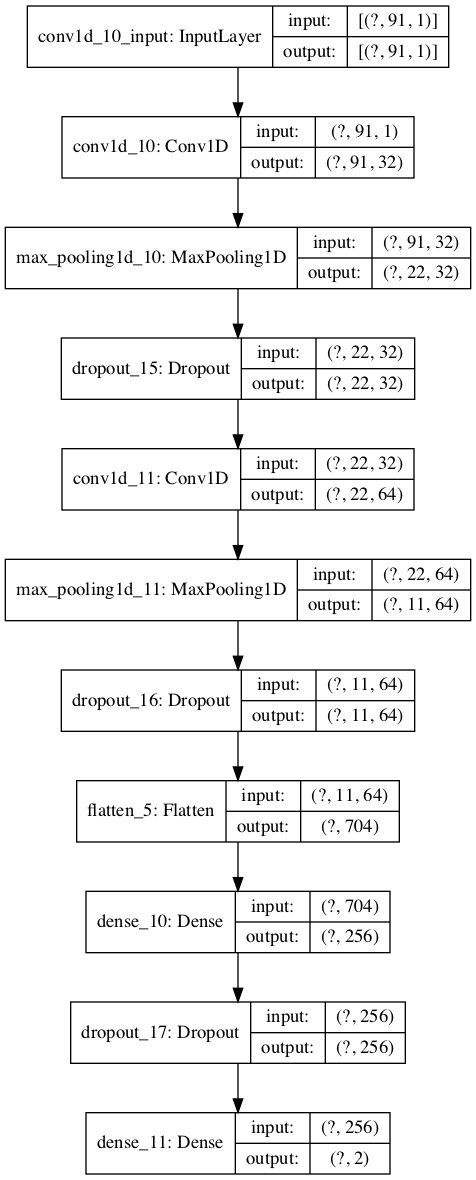

In [113]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [114]:
pred = model.predict(x_test)
y_pred= np.argmax(pred, axis = 1)

InvalidArgumentError:  Input to reshape is a tensor with 20480 values, but the requested shape requires a multiple of 704
	 [[node sequential_5/flatten_5/Reshape (defined at <ipython-input-98-1f6e536efeab>:1) ]] [Op:__inference_predict_function_252845]

Function call stack:
predict_function


Evaluation of the model

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [41]:
confusion_matrix(Y_test, y_pred)

array([[8722,  989],
       [2876, 9938]])

In [42]:
accuracy =accuracy_score(Y_test, y_pred)*100
print(accuracy)

82.84128745837958


In [43]:
print(y_pred)
# print(len(y_pred))

[1 1 0 ... 0 0 1]


In [44]:
print(y_21_test)

0        1
1        1
2        1
3        0
4        1
        ..
11845    0
11846    0
11847    1
11848    1
11849    1
Name: attack_type, Length: 11850, dtype: int64


In [45]:
pred = model.predict(x_21_test)
y_pred= np.argmax(pred, axis = 1)

In [46]:
confusion_matrix(y_21_test, y_pred)

array([[1204,  948],
       [2876, 6822]])

In [47]:
print(y_pred)

[0 1 1 ... 1 1 1]


In [49]:
acc_21 = accuracy_score(y_21_test, y_pred)* 100
print(acc_21)

67.72995780590718


In [50]:
recall = recall_score(y_21_test, y_pred , average="binary")
precision = precision_score(y_21_test, y_pred , average="binary")
f1 = f1_score(y_21_test, y_pred, average="binary")

In [53]:
print("accuracy")
print("%.3f" %acc_21)
print("racall")
print("%.3f" %recall)
print("precision")
print("%.3f" %precision)
print("f1score")
print(f1)

accuracy
67.730
racall
0.703
precision
0.878
f1score
0.7810854133272269


In [52]:
print("F-Score : ", f1*100)
print("Precision : " , precision*100)
print("Recall : ", recall*100)
print("Accuracy : ",acc_21)

F-Score :  78.1085413327227
Precision :  87.7992277992278
Recall :  70.3444009074036
Accuracy :  67.72995780590718
